In [41]:
# 下記セルを実行すると、authorization codeの入力を求められます。
# 出力されたリンク先をクリックし、Googleアカウントにログインし、
# authorization codeをコピーし、貼り付けをおこなってください。
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
import os
project = '100knock-process-visualization'
chapter = 2
os.chdir(f'/content/drive/MyDrive/{project}/chapter-{chapter}/')

# ２章 ＥＸＣＥＬデータの加工・可視化を行う２０本ノック

## ノック２１：Excelデータを読み込んでみよう

In [43]:
import pandas as pd
data = pd.read_excel('data/1-2-2020.xlsx')
data.head()

,１－（２）．都道府県別発電所数、出力数 （２０２０年４月）,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,２０２０年 ８月３日公表時点,Unnamed: 21,（単位：kW）
0,都道府県,水力発電所,NaN,火力発電所,NaN,原子力発電所,NaN,新エネルギー等発電所,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,その他,NaN,合計,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,風力,NaN,太陽光,...,〔バイオマス〕,NaN,〔廃棄物〕,NaN,計,NaN,NaN,NaN,NaN,NaN
2,NaN,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,...,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計
3,北海道,98,2032077.6,32,6176880,1,2070000,56,428134,127,...,3,96650,3,49920,184,1128885.1,0,0,315,11407842.7
4,青森県,19,128750,10,655750,1,1100000,24,593870,35,...,4,134850,1,18800,59,993867,0,0,89,2878367


In [44]:
data.tail()

,１－（２）．都道府県別発電所数、出力数 （２０２０年４月）,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,２０２０年 ８月３日公表時点,Unnamed: 21,（単位：kW）
49,沖縄県,0,0,26,2470080,0,0,13,18130,1,...,0,0,0,0,14,30130,0,0,40,2500210
50,合 計,1748,49638035.6,461,169249967,15,33083000,315,3647239.2,2562,...,78,2483852,61,971126,2893,14865055.2,2,42910,5119,266878967.8
51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,備考,１ バイオマスまたは廃棄物の欄には、専ら又は主として使用する燃料がバイオマス又は廃棄物の場合...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,NaN,２ 一つの発電所内に複数の発電機が存在し、電源種別が異なる場合には、発電所数は最大出力が最大...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
data = pd.read_excel('data/1-2-2020.xlsx', skiprows=4, header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,北海道,98,2032077.6,32.0,6176880.0,1.0,2070000.0,56.0,428134.0,127.0,...,3.0,96650.0,3.0,49920.0,184.0,1128885.1,0.0,0.0,315.0,11407842.7
1,青森県,19,128750.0,10.0,655750.0,1.0,1100000.0,24.0,593870.0,35.0,...,4.0,134850.0,1.0,18800.0,59.0,993867.0,0.0,0.0,89.0,2878367.0
2,岩手県,40,274661.0,3.0,238000.0,0.0,0.0,5.0,109180.0,27.0,...,2.0,89000.0,0.0,0.0,34.0,451113.4,0.0,0.0,77.0,963774.4
3,宮城県,22,63915.0,10.0,2211050.0,1.0,1650000.0,1.0,20400.0,75.0,...,0.0,12900.0,4.0,35850.0,76.0,454812.0,0.0,0.0,109.0,4379777.0
4,秋田県,42,287863.0,4.0,2497550.0,0.0,0.0,24.0,422518.6,24.0,...,1.0,20500.0,0.0,15000.0,51.0,627939.2,0.0,0.0,97.0,3413352.2


In [46]:
data.drop(data.tail(4).index, inplace=True)
data.tail()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
42,熊本県,49,803395.0,5.0,1562280.0,0.0,0.0,2.0,26000.0,81.0,...,1.0,76780.0,2.0,10500.0,83.0,258540.0,0.0,0.0,137.0,2624215.0
43,大分県,38,300520.0,9.0,4111600.0,0.0,0.0,1.0,11000.0,53.0,...,4.0,118200.0,0.0,0.0,60.0,558694.6,0.0,0.0,107.0,4970814.6
44,宮崎県,48,2158730.0,4.0,204940.0,0.0,0.0,1.0,16000.0,35.0,...,3.0,76700.0,0.0,0.0,36.0,264774.5,0.0,0.0,88.0,2628444.5
45,鹿児島県,35,195808.0,30.0,1307600.0,1.0,1780000.0,18.0,225470.0,143.0,...,2.0,72700.0,0.0,0.0,164.0,877953.0,0.0,0.0,230.0,4161361.0
46,沖縄県,0,0.0,26.0,2470080.0,0.0,0.0,13.0,18130.0,1.0,...,0.0,0.0,0.0,0.0,14.0,30130.0,0.0,0.0,40.0,2500210.0


## ノック２２：カラムを抽出して付与してみよう

In [47]:
col_data = pd.read_excel('data/1-2-2020.xlsx', skiprows=1, header=None)
col_data = col_data.head(3)
col_data

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,都道府県,水力発電所,NaN,火力発電所,NaN,原子力発電所,NaN,新エネルギー等発電所,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,その他,NaN,合計,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,風力,NaN,太陽光,...,〔バイオマス〕,NaN,〔廃棄物〕,NaN,計,NaN,NaN,NaN,NaN,NaN
2,NaN,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,...,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計


In [48]:
col_data.iloc[1, 1:].fillna(col_data.iloc[0, 1:], inplace=True)
col_data.iloc[1, 1:] = col_data.iloc[1, 1:].str.replace('発電所', '')
col_data

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,都道府県,水力発電所,NaN,火力発電所,NaN,原子力発電所,NaN,新エネルギー等発電所,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,その他,NaN,合計,NaN
1,NaN,水力,NaN,火力,NaN,原子力,NaN,風力,NaN,太陽光,...,〔バイオマス〕,NaN,〔廃棄物〕,NaN,計,NaN,その他,NaN,合計,NaN
2,NaN,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,...,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計


In [49]:
for i in col_data.columns:
  if i < col_data.columns.max():
    col_data[i + 1].fillna(col_data[i], inplace=True)
col_data

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,都道府県,水力発電所,水力発電所,火力発電所,火力発電所,原子力発電所,原子力発電所,新エネルギー等発電所,新エネルギー等発電所,新エネルギー等発電所,...,新エネルギー等発電所,新エネルギー等発電所,新エネルギー等発電所,新エネルギー等発電所,新エネルギー等発電所,新エネルギー等発電所,その他,その他,合計,合計
1,NaN,水力,水力,火力,火力,原子力,原子力,風力,風力,太陽光,...,〔バイオマス〕,〔バイオマス〕,〔廃棄物〕,〔廃棄物〕,計,計,その他,その他,合計,合計
2,NaN,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,...,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計


In [50]:
col_data.replace('〔バイオマス〕', 'バイオマス', inplace=True)
col_data.replace('〔廃棄物〕', '廃棄物', inplace=True)
col_data

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,都道府県,水力発電所,水力発電所,火力発電所,火力発電所,原子力発電所,原子力発電所,新エネルギー等発電所,新エネルギー等発電所,新エネルギー等発電所,...,新エネルギー等発電所,新エネルギー等発電所,新エネルギー等発電所,新エネルギー等発電所,新エネルギー等発電所,新エネルギー等発電所,その他,その他,合計,合計
1,NaN,水力,水力,火力,火力,原子力,原子力,風力,風力,太陽光,...,バイオマス,バイオマス,廃棄物,廃棄物,計,計,その他,その他,合計,合計
2,NaN,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,...,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計


In [51]:
tg_col = '_'.join(list(col_data[0].dropna()))
print(tg_col)
tg_col = '_'.join(list(col_data[1].dropna()))
print(tg_col)

都道府県
水力発電所_水力_発電所数


In [52]:
cols = []
for i in col_data.columns:
  tg_col = '_'.join(list(col_data[i].dropna()))
  cols.append(tg_col)
cols

['都道府県',
 '水力発電所_水力_発電所数',
 '水力発電所_水力_最大出力計',
 '火力発電所_火力_発電所数',
 '火力発電所_火力_最大出力計',
 '原子力発電所_原子力_発電所数',
 '原子力発電所_原子力_最大出力計',
 '新エネルギー等発電所_風力_発電所数',
 '新エネルギー等発電所_風力_最大出力計',
 '新エネルギー等発電所_太陽光_発電所数',
 '新エネルギー等発電所_太陽光_最大出力計',
 '新エネルギー等発電所_地熱_発電所数',
 '新エネルギー等発電所_地熱_最大出力計',
 '新エネルギー等発電所_バイオマス_発電所数',
 '新エネルギー等発電所_バイオマス_最大出力計',
 '新エネルギー等発電所_廃棄物_発電所数',
 '新エネルギー等発電所_廃棄物_最大出力計',
 '新エネルギー等発電所_計_発電所数',
 '新エネルギー等発電所_計_最大出力計',
 'その他_その他_発電所数',
 'その他_その他_最大出力計',
 '合計_合計_発電所数',
 '合計_合計_最大出力計']

In [53]:
data.columns = cols
data.head()

,都道府県,水力発電所_水力_発電所数,水力発電所_水力_最大出力計,火力発電所_火力_発電所数,火力発電所_火力_最大出力計,原子力発電所_原子力_発電所数,原子力発電所_原子力_最大出力計,新エネルギー等発電所_風力_発電所数,新エネルギー等発電所_風力_最大出力計,新エネルギー等発電所_太陽光_発電所数,...,新エネルギー等発電所_バイオマス_発電所数,新エネルギー等発電所_バイオマス_最大出力計,新エネルギー等発電所_廃棄物_発電所数,新エネルギー等発電所_廃棄物_最大出力計,新エネルギー等発電所_計_発電所数,新エネルギー等発電所_計_最大出力計,その他_その他_発電所数,その他_その他_最大出力計,合計_合計_発電所数,合計_合計_最大出力計
0,北海道,98,2032077.6,32.0,6176880.0,1.0,2070000.0,56.0,428134.0,127.0,...,3.0,96650.0,3.0,49920.0,184.0,1128885.1,0.0,0.0,315.0,11407842.7
1,青森県,19,128750.0,10.0,655750.0,1.0,1100000.0,24.0,593870.0,35.0,...,4.0,134850.0,1.0,18800.0,59.0,993867.0,0.0,0.0,89.0,2878367.0
2,岩手県,40,274661.0,3.0,238000.0,0.0,0.0,5.0,109180.0,27.0,...,2.0,89000.0,0.0,0.0,34.0,451113.4,0.0,0.0,77.0,963774.4
3,宮城県,22,63915.0,10.0,2211050.0,1.0,1650000.0,1.0,20400.0,75.0,...,0.0,12900.0,4.0,35850.0,76.0,454812.0,0.0,0.0,109.0,4379777.0
4,秋田県,42,287863.0,4.0,2497550.0,0.0,0.0,24.0,422518.6,24.0,...,1.0,20500.0,0.0,15000.0,51.0,627939.2,0.0,0.0,97.0,3413352.2


## ノック２３：全シートのデータを読み込んでみよう

In [54]:
xl = pd.ExcelFile('data/1-2-2020.xlsx')
sheets = xl.sheet_names
sheets

['2020.4',
 '2020.5',
 '2020.6',
 '2020.7',
 '2020.8',
 '2020.9',
 '2020.10',
 '2020.11',
 '2020.12',
 '2021.1']

In [55]:
data = xl.parse(sheets[0], skiprows=4, header=None)
data.drop(data.tail(4).index, inplace=True)
data.columns = cols
data.head()

,都道府県,水力発電所_水力_発電所数,水力発電所_水力_最大出力計,火力発電所_火力_発電所数,火力発電所_火力_最大出力計,原子力発電所_原子力_発電所数,原子力発電所_原子力_最大出力計,新エネルギー等発電所_風力_発電所数,新エネルギー等発電所_風力_最大出力計,新エネルギー等発電所_太陽光_発電所数,...,新エネルギー等発電所_バイオマス_発電所数,新エネルギー等発電所_バイオマス_最大出力計,新エネルギー等発電所_廃棄物_発電所数,新エネルギー等発電所_廃棄物_最大出力計,新エネルギー等発電所_計_発電所数,新エネルギー等発電所_計_最大出力計,その他_その他_発電所数,その他_その他_最大出力計,合計_合計_発電所数,合計_合計_最大出力計
0,北海道,98,2032077.6,32.0,6176880.0,1.0,2070000.0,56.0,428134.0,127.0,...,3.0,96650.0,3.0,49920.0,184.0,1128885.1,0.0,0.0,315.0,11407842.7
1,青森県,19,128750.0,10.0,655750.0,1.0,1100000.0,24.0,593870.0,35.0,...,4.0,134850.0,1.0,18800.0,59.0,993867.0,0.0,0.0,89.0,2878367.0
2,岩手県,40,274661.0,3.0,238000.0,0.0,0.0,5.0,109180.0,27.0,...,2.0,89000.0,0.0,0.0,34.0,451113.4,0.0,0.0,77.0,963774.4
3,宮城県,22,63915.0,10.0,2211050.0,1.0,1650000.0,1.0,20400.0,75.0,...,0.0,12900.0,4.0,35850.0,76.0,454812.0,0.0,0.0,109.0,4379777.0
4,秋田県,42,287863.0,4.0,2497550.0,0.0,0.0,24.0,422518.6,24.0,...,1.0,20500.0,0.0,15000.0,51.0,627939.2,0.0,0.0,97.0,3413352.2


In [56]:
datas = []
for sheet in sheets:
  data = xl.parse(sheet, skiprows=4, header=None)
  data.drop(data.tail(4).index, inplace=True)
  data.columns = cols
  data['年月'] = sheet
  datas.append(data)
datas

[    都道府県 水力発電所_水力_発電所数  水力発電所_水力_最大出力計  火力発電所_火力_発電所数  火力発電所_火力_最大出力計  \
 0    北海道            98       2032077.6           32.0       6176880.0   
 1    青森県            19        128750.0           10.0        655750.0   
 2    岩手県            40        274661.0            3.0        238000.0   
 3    宮城県            22         63915.0           10.0       2211050.0   
 4    秋田県            42        287863.0            4.0       2497550.0   
 5    山形県            42        401814.0            3.0        750750.0   
 6    福島県            94       3973025.0           12.0      11626600.0   
 7    茨城県             6         13450.0           16.0       9985120.0   
 8    栃木県            33       2942130.0            3.0       1291200.0   
 9    群馬県            74       3126512.0            3.0         45350.0   
 10   埼玉県            13         68580.0            3.0        151200.0   
 11   千葉県             1           132.0           22.0      20049525.0   
 12   東京都             5         44750.

In [57]:
datas = pd.concat(datas, ignore_index=True)
datas.head()

,都道府県,水力発電所_水力_発電所数,水力発電所_水力_最大出力計,火力発電所_火力_発電所数,火力発電所_火力_最大出力計,原子力発電所_原子力_発電所数,原子力発電所_原子力_最大出力計,新エネルギー等発電所_風力_発電所数,新エネルギー等発電所_風力_最大出力計,新エネルギー等発電所_太陽光_発電所数,...,新エネルギー等発電所_バイオマス_最大出力計,新エネルギー等発電所_廃棄物_発電所数,新エネルギー等発電所_廃棄物_最大出力計,新エネルギー等発電所_計_発電所数,新エネルギー等発電所_計_最大出力計,その他_その他_発電所数,その他_その他_最大出力計,合計_合計_発電所数,合計_合計_最大出力計,年月
0,北海道,98,2032077.6,32.0,6176880.0,1.0,2070000.0,56.0,428134.0,127.0,...,96650.0,3.0,49920.0,184.0,1128885.1,0.0,0.0,315.0,11407842.7,2020.4
1,青森県,19,128750.0,10.0,655750.0,1.0,1100000.0,24.0,593870.0,35.0,...,134850.0,1.0,18800.0,59.0,993867.0,0.0,0.0,89.0,2878367.0,2020.4
2,岩手県,40,274661.0,3.0,238000.0,0.0,0.0,5.0,109180.0,27.0,...,89000.0,0.0,0.0,34.0,451113.4,0.0,0.0,77.0,963774.4,2020.4
3,宮城県,22,63915.0,10.0,2211050.0,1.0,1650000.0,1.0,20400.0,75.0,...,12900.0,4.0,35850.0,76.0,454812.0,0.0,0.0,109.0,4379777.0,2020.4
4,秋田県,42,287863.0,4.0,2497550.0,0.0,0.0,24.0,422518.6,24.0,...,20500.0,0.0,15000.0,51.0,627939.2,0.0,0.0,97.0,3413352.2,2020.4


In [58]:
len(datas)

470

## ノック２４：データの値を計算で修正しよう

In [59]:
datas['火力発電所_火力_発電所数'] = datas['火力発電所_火力_発電所数'] - datas['新エネルギー等発電所_バイオマス_発電所数'] - datas['新エネルギー等発電所_廃棄物_発電所数']
datas['火力発電所_火力_最大出力計'] = datas['火力発電所_火力_最大出力計'] - datas['新エネルギー等発電所_バイオマス_最大出力計'] - datas['新エネルギー等発電所_廃棄物_最大出力計']
datas.head()

,都道府県,水力発電所_水力_発電所数,水力発電所_水力_最大出力計,火力発電所_火力_発電所数,火力発電所_火力_最大出力計,原子力発電所_原子力_発電所数,原子力発電所_原子力_最大出力計,新エネルギー等発電所_風力_発電所数,新エネルギー等発電所_風力_最大出力計,新エネルギー等発電所_太陽光_発電所数,...,新エネルギー等発電所_バイオマス_最大出力計,新エネルギー等発電所_廃棄物_発電所数,新エネルギー等発電所_廃棄物_最大出力計,新エネルギー等発電所_計_発電所数,新エネルギー等発電所_計_最大出力計,その他_その他_発電所数,その他_その他_最大出力計,合計_合計_発電所数,合計_合計_最大出力計,年月
0,北海道,98,2032077.6,26.0,6030310.0,1.0,2070000.0,56.0,428134.0,127.0,...,96650.0,3.0,49920.0,184.0,1128885.1,0.0,0.0,315.0,11407842.7,2020.4
1,青森県,19,128750.0,5.0,502100.0,1.0,1100000.0,24.0,593870.0,35.0,...,134850.0,1.0,18800.0,59.0,993867.0,0.0,0.0,89.0,2878367.0,2020.4
2,岩手県,40,274661.0,1.0,149000.0,0.0,0.0,5.0,109180.0,27.0,...,89000.0,0.0,0.0,34.0,451113.4,0.0,0.0,77.0,963774.4,2020.4
3,宮城県,22,63915.0,6.0,2162300.0,1.0,1650000.0,1.0,20400.0,75.0,...,12900.0,4.0,35850.0,76.0,454812.0,0.0,0.0,109.0,4379777.0,2020.4
4,秋田県,42,287863.0,3.0,2462050.0,0.0,0.0,24.0,422518.6,24.0,...,20500.0,0.0,15000.0,51.0,627939.2,0.0,0.0,97.0,3413352.2,2020.4


## ノック２５：必要なカラムだけに絞り込もう

In [60]:
datas.columns

Index(['都道府県', '水力発電所_水力_発電所数', '水力発電所_水力_最大出力計', '火力発電所_火力_発電所数',
       '火力発電所_火力_最大出力計', '原子力発電所_原子力_発電所数', '原子力発電所_原子力_最大出力計',
       '新エネルギー等発電所_風力_発電所数', '新エネルギー等発電所_風力_最大出力計', '新エネルギー等発電所_太陽光_発電所数',
       '新エネルギー等発電所_太陽光_最大出力計', '新エネルギー等発電所_地熱_発電所数', '新エネルギー等発電所_地熱_最大出力計',
       '新エネルギー等発電所_バイオマス_発電所数', '新エネルギー等発電所_バイオマス_最大出力計',
       '新エネルギー等発電所_廃棄物_発電所数', '新エネルギー等発電所_廃棄物_最大出力計', '新エネルギー等発電所_計_発電所数',
       '新エネルギー等発電所_計_最大出力計', 'その他_その他_発電所数', 'その他_その他_最大出力計', '合計_合計_発電所数',
       '合計_合計_最大出力計', '年月'],
      dtype='object')

In [61]:
datas.drop(['合計_合計_発電所数', '合計_合計_最大出力計', '新エネルギー等発電所_計_発電所数', '新エネルギー等発電所_計_最大出力計'], axis=1, inplace=True)
datas.head()

,都道府県,水力発電所_水力_発電所数,水力発電所_水力_最大出力計,火力発電所_火力_発電所数,火力発電所_火力_最大出力計,原子力発電所_原子力_発電所数,原子力発電所_原子力_最大出力計,新エネルギー等発電所_風力_発電所数,新エネルギー等発電所_風力_最大出力計,新エネルギー等発電所_太陽光_発電所数,新エネルギー等発電所_太陽光_最大出力計,新エネルギー等発電所_地熱_発電所数,新エネルギー等発電所_地熱_最大出力計,新エネルギー等発電所_バイオマス_発電所数,新エネルギー等発電所_バイオマス_最大出力計,新エネルギー等発電所_廃棄物_発電所数,新エネルギー等発電所_廃棄物_最大出力計,その他_その他_発電所数,その他_その他_最大出力計,年月
0,北海道,98,2032077.6,26.0,6030310.0,1.0,2070000.0,56.0,428134.0,127.0,675751.1,1.0,25000.0,3.0,96650.0,3.0,49920.0,0.0,0.0,2020.4
1,青森県,19,128750.0,5.0,502100.0,1.0,1100000.0,24.0,593870.0,35.0,399997.0,0.0,0.0,4.0,134850.0,1.0,18800.0,0.0,0.0,2020.4
2,岩手県,40,274661.0,1.0,149000.0,0.0,0.0,5.0,109180.0,27.0,238433.4,2.0,103500.0,2.0,89000.0,0.0,0.0,0.0,0.0,2020.4
3,宮城県,22,63915.0,6.0,2162300.0,1.0,1650000.0,1.0,20400.0,75.0,434412.0,0.0,0.0,0.0,12900.0,4.0,35850.0,0.0,0.0,2020.4
4,秋田県,42,287863.0,3.0,2462050.0,0.0,0.0,24.0,422518.6,24.0,117121.0,3.0,88300.0,1.0,20500.0,0.0,15000.0,0.0,0.0,2020.4


## ノック２６：縦持ちデータを作成しよう

In [62]:
datas_v = pd.melt(datas, id_vars=['都道府県', '年月'], var_name="変数名", value_name="値")
datas_v.head()

,都道府県,年月,変数名,値
0,北海道,2020.4,水力発電所_水力_発電所数,98
1,青森県,2020.4,水力発電所_水力_発電所数,19
2,岩手県,2020.4,水力発電所_水力_発電所数,40
3,宮城県,2020.4,水力発電所_水力_発電所数,22
4,秋田県,2020.4,水力発電所_水力_発電所数,42


## ノック２７：縦持ちデータを整形しよう

In [63]:
var_data = datas_v['変数名'].str.split('_', expand=True)
var_data.head()

,0,1,2
0,水力発電所,水力,発電所数
1,水力発電所,水力,発電所数
2,水力発電所,水力,発電所数
3,水力発電所,水力,発電所数
4,水力発電所,水力,発電所数


In [64]:
var_data.columns = ['発電所種別', '発電種別', '項目']
datas_v = pd.concat([datas_v, var_data], axis=1)
datas_v.drop(['変数名'], axis=1, inplace=True)
datas_v.head()

,都道府県,年月,値,発電所種別,発電種別,項目
0,北海道,2020.4,98,水力発電所,水力,発電所数
1,青森県,2020.4,19,水力発電所,水力,発電所数
2,岩手県,2020.4,40,水力発電所,水力,発電所数
3,宮城県,2020.4,22,水力発電所,水力,発電所数
4,秋田県,2020.4,42,水力発電所,水力,発電所数


## ノック２８：発電実績データを加工しよう

In [65]:
capacity_data = pd.read_excel('data/2-2-2020.xlsx')
display(capacity_data.head())
display(capacity_data.tail())

,２－（２）．都道府県別発電実績 （２０２０年４月）,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,２０２０年８月３日公表時点,Unnamed: 10,"（単位：1,000kWh）"
0,都道府県,水力発電所,火力発電所,原子力発電所,新エネルギー等発電所,NaN,NaN,NaN,NaN,NaN,その他,合計
1,NaN,NaN,NaN,NaN,風力,太陽光,地熱,〔バイオマス〕,〔廃棄物〕,計,NaN,NaN
2,NaN,電力量,電力量,電力量,電力量,電力量,電力量,電力量,電力量,電力量,電力量,電力量
3,北海道,408779.3,1838320.47,0,86901.404,104709.672,10354,100682,32870,201965.076,0,2449064.846
4,青森県,50945,189372,0,130363.28,52596.6659,0,73726,6823,182959.9459,0,423276.9459


,２－（２）．都道府県別発電実績 （２０２０年４月）,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,２０２０年８月３日公表時点,Unnamed: 10,"（単位：1,000kWh）"
48,鹿児島県,34701,70601,654763,26101.985,74286.66,25633,30089,0,126021.645,0,886086.645
49,沖縄県,0,478257,0,2653,1215,0,1758,0,3868,0,482125
50,合 計,8296665.947,46596894.9142,4631681.89,709349.955,1596008.836673,159402,1428699.17284,316874.30255,2464760.791673,17256,62007262.965873
51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,備考,バイオマスまたは廃棄物の欄には、専ら又は主として使用する燃料がバイオマス又は廃棄物の場合には...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
col_ca_data = pd.read_excel('data/2-2-2020.xlsx', skiprows=1, header=None)
col_ca_data = col_ca_data.head(3)

col_ca_data.iloc[1,1:].fillna(col_ca_data.iloc[0,1:], inplace=True)
col_ca_data.iloc[1,1:] = col_ca_data.iloc[1,1:].str.replace('発電所', '')

for i in col_ca_data.columns:
  if i < col_ca_data.columns.max():
    col_ca_data[i + 1].fillna(col_ca_data[i], inplace=True)
col_ca_data.replace('〔バイオマス〕', 'バイオマス', inplace=True)
col_ca_data.replace('〔廃棄物〕', '廃棄物', inplace=True)

cols_ca = []
for i in col_ca_data.columns:
  tg_col = '_'.join(list(col_ca_data[i].dropna()))
  cols_ca.append(tg_col)
cols_ca

['都道府県',
 '水力発電所_水力_電力量',
 '火力発電所_火力_電力量',
 '原子力発電所_原子力_電力量',
 '新エネルギー等発電所_風力_電力量',
 '新エネルギー等発電所_太陽光_電力量',
 '新エネルギー等発電所_地熱_電力量',
 '新エネルギー等発電所_バイオマス_電力量',
 '新エネルギー等発電所_廃棄物_電力量',
 '新エネルギー等発電所_計_電力量',
 'その他_その他_電力量',
 '合計_合計_電力量']

In [67]:
xl_ca = pd.ExcelFile('data/2-2-2020.xlsx')
sheets = xl_ca.sheet_names
ca_datas = []
for sheet in sheets:
  capacity_data = xl_ca.parse(sheet, skiprows=4, header=None)
  capacity_data = capacity_data.head(47)
  capacity_data.columns = cols_ca
  capacity_data['年月'] = sheet
  ca_datas.append(capacity_data)
ca_datas = pd.concat(ca_datas, ignore_index=True)
ca_datas.head()

,都道府県,水力発電所_水力_電力量,火力発電所_火力_電力量,原子力発電所_原子力_電力量,新エネルギー等発電所_風力_電力量,新エネルギー等発電所_太陽光_電力量,新エネルギー等発電所_地熱_電力量,新エネルギー等発電所_バイオマス_電力量,新エネルギー等発電所_廃棄物_電力量,新エネルギー等発電所_計_電力量,その他_その他_電力量,合計_合計_電力量,年月
0,北海道,408779.3,1838320.47,0.0,86901.404,104709.6720,10354.0,100682.00,32870.0,201965.0760,0.0,2.449065e+06,2020.4
1,青森県,50945,189372.00,0.0,130363.280,52596.6659,0.0,73726.00,6823.0,182959.9459,0.0,4.232769e+05,2020.4
2,岩手県,144505,56981.05,0.0,31640.883,31047.0000,21889.0,56371.05,0.0,84576.8830,0.0,2.860629e+05,2020.4
3,宮城県,33697,943982.00,0.0,5176.000,68463.1100,0.0,72447.00,25211.0,73639.1100,0.0,1.051318e+06,2020.4
4,秋田県,122188,1135707.37,0.0,109050.502,14774.3000,42218.0,13966.37,7599.0,166042.8020,0.0,1.423938e+06,2020.4


In [68]:
ca_datas['火力発電所_火力_電力量'] = ca_datas['火力発電所_火力_電力量'] - ca_datas['新エネルギー等発電所_バイオマス_電力量'] - ca_datas['新エネルギー等発電所_廃棄物_電力量']
ca_datas.drop(['合計_合計_電力量','新エネルギー等発電所_計_電力量'],axis=1,inplace=True)
ca_datas_v = pd.melt(ca_datas, id_vars=['都道府県','年月'],var_name='変数名',value_name='値')
var_data = ca_datas_v['変数名'].str.split('_',expand=True)
var_data.columns = ['発電所種別','発電種別','項目']
ca_datas_v = pd.concat([ca_datas_v, var_data],axis=1)
ca_datas_v.drop(['変数名'],axis=1,inplace=True)
ca_datas_v.head()

,都道府県,年月,値,発電所種別,発電種別,項目
0,北海道,2020.4,408779.3,水力発電所,水力,電力量
1,青森県,2020.4,50945,水力発電所,水力,電力量
2,岩手県,2020.4,144505,水力発電所,水力,電力量
3,宮城県,2020.4,33697,水力発電所,水力,電力量
4,秋田県,2020.4,122188,水力発電所,水力,電力量


## ノック２９：可視化用データを仕上げよう

In [69]:
datas_v_all = pd.concat([datas_v, ca_datas_v], ignore_index=True)
display(datas_v_all.head())
display(datas_v_all.tail())

,都道府県,年月,値,発電所種別,発電種別,項目
0,北海道,2020.4,98,水力発電所,水力,発電所数
1,青森県,2020.4,19,水力発電所,水力,発電所数
2,岩手県,2020.4,40,水力発電所,水力,発電所数
3,宮城県,2020.4,22,水力発電所,水力,発電所数
4,秋田県,2020.4,42,水力発電所,水力,発電所数


,都道府県,年月,値,発電所種別,発電種別,項目
12685,熊本県,2021.1,0.0,その他,その他,電力量
12686,大分県,2021.1,0.0,その他,その他,電力量
12687,宮崎県,2021.1,0.0,その他,その他,電力量
12688,鹿児島県,2021.1,0.0,その他,その他,電力量
12689,沖縄県,2021.1,0.0,その他,その他,電力量


In [70]:
pd.pivot_table(datas_v_all.loc[datas_v_all['年月']=='2020.4'], index='発電所種別', columns='項目', values='値', aggfunc='sum')

項目,最大出力計,発電所数,電力量
発電所種別,,,
その他,42910.0,2.0,17256.0
原子力発電所,33083000.0,15.0,4631681.89
新エネルギー等発電所,18320031.87,3032.0,4210334.816063
水力発電所,49638035.6,1748,8296664.267
火力発電所,165794989.0,322.0,44851321.43881


## ノック３０：データ分布をヒストグラムで可視化してみよう

In [71]:
%%shell
pip install japanize-matplotlib

<Axes: ylabel='Count'>

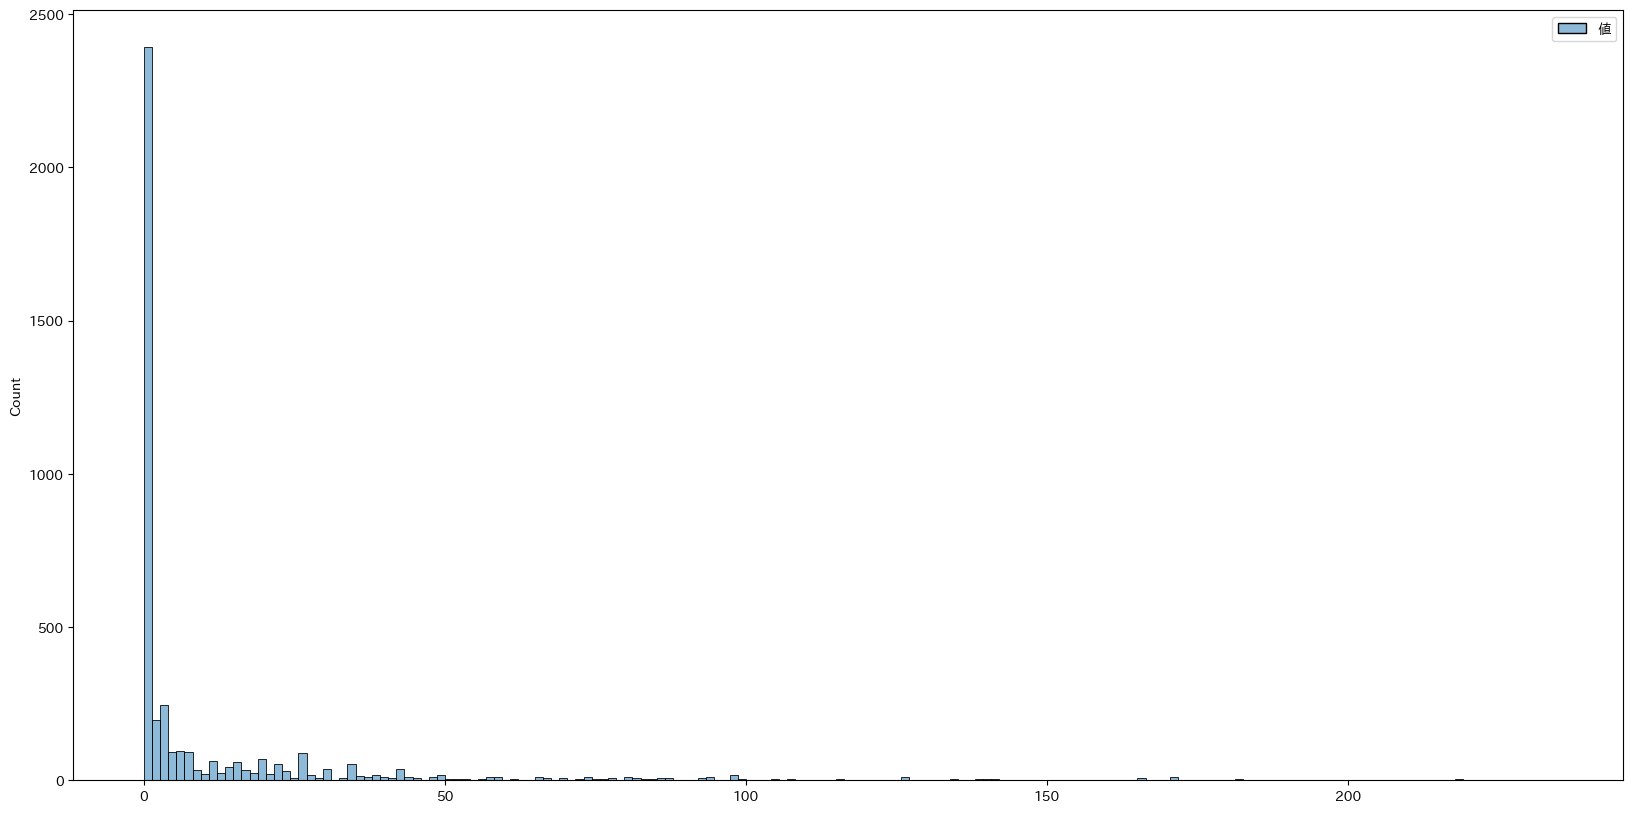

In [72]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

plt.figure(figsize=(20,10))
sns.histplot(datas_v_all.loc[datas_v_all['項目']=='発電所数'])

<Axes: ylabel='Count'>

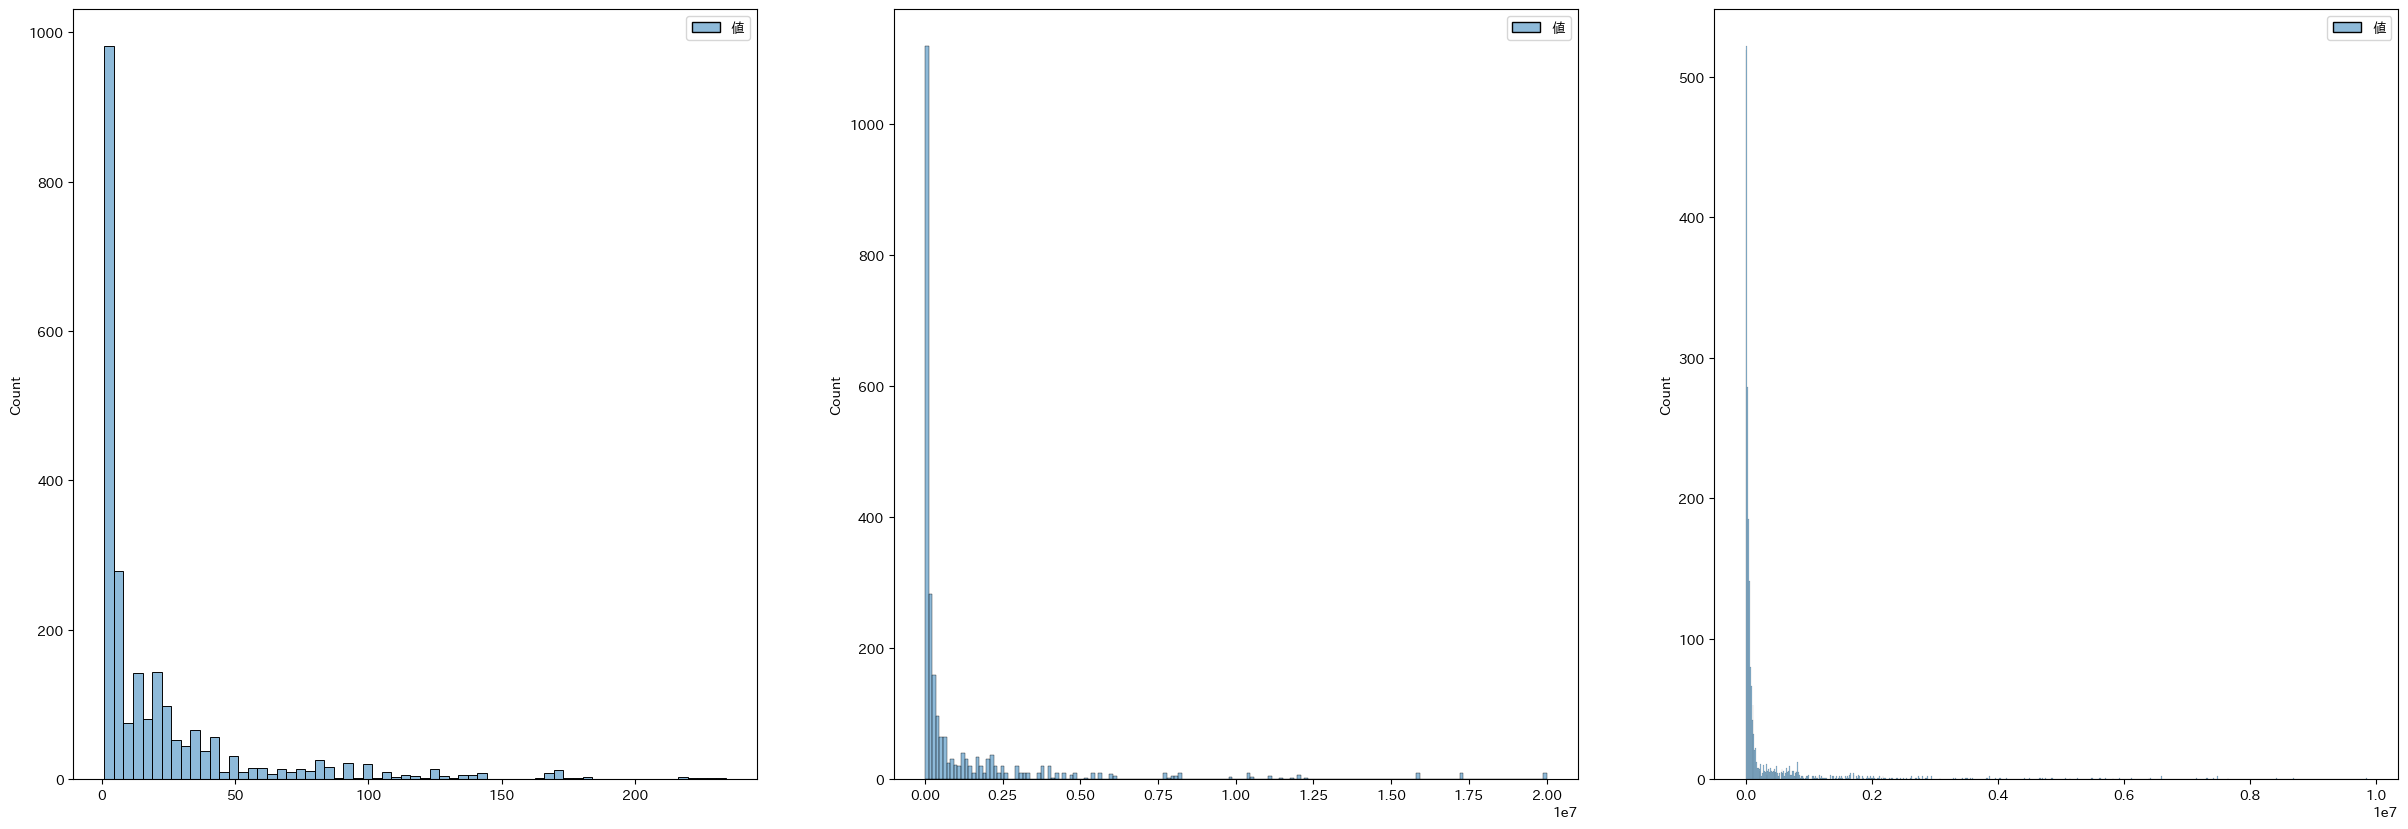

In [73]:
fig, axes = plt.subplots(1,3,figsize=(30,10))
viz_data = datas_v_all.loc[datas_v_all['値']!=0]
sns.histplot(viz_data.loc[viz_data['項目']=='発電所数'], ax=axes[0])
sns.histplot(viz_data.loc[viz_data['項目']=='最大出力計'], ax=axes[1])
sns.histplot(viz_data.loc[viz_data['項目']=='電力量'], ax=axes[2])

## ノック３１：データ分布を箱ひげ図で可視化してみよう

<Axes: ylabel='値'>

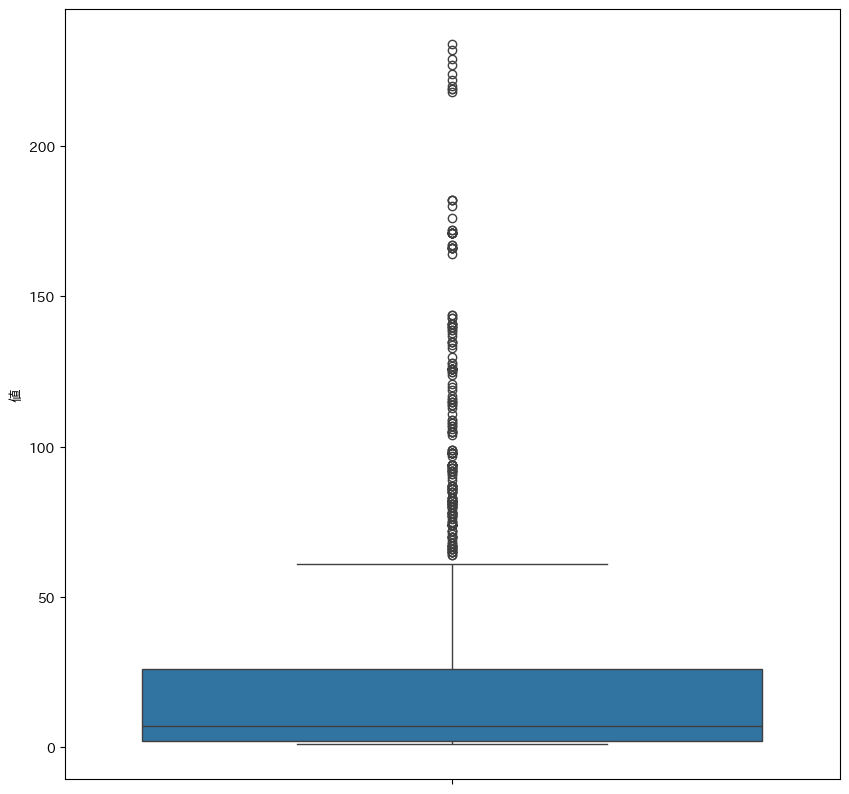

In [74]:
plt.figure(figsize=(10,10))
viz_data = datas_v_all.loc[(datas_v_all['項目']=='発電所数')&(datas_v_all['値']!=0)]
sns.boxplot(y=viz_data['値'])

<Axes: xlabel='発電種別', ylabel='値'>

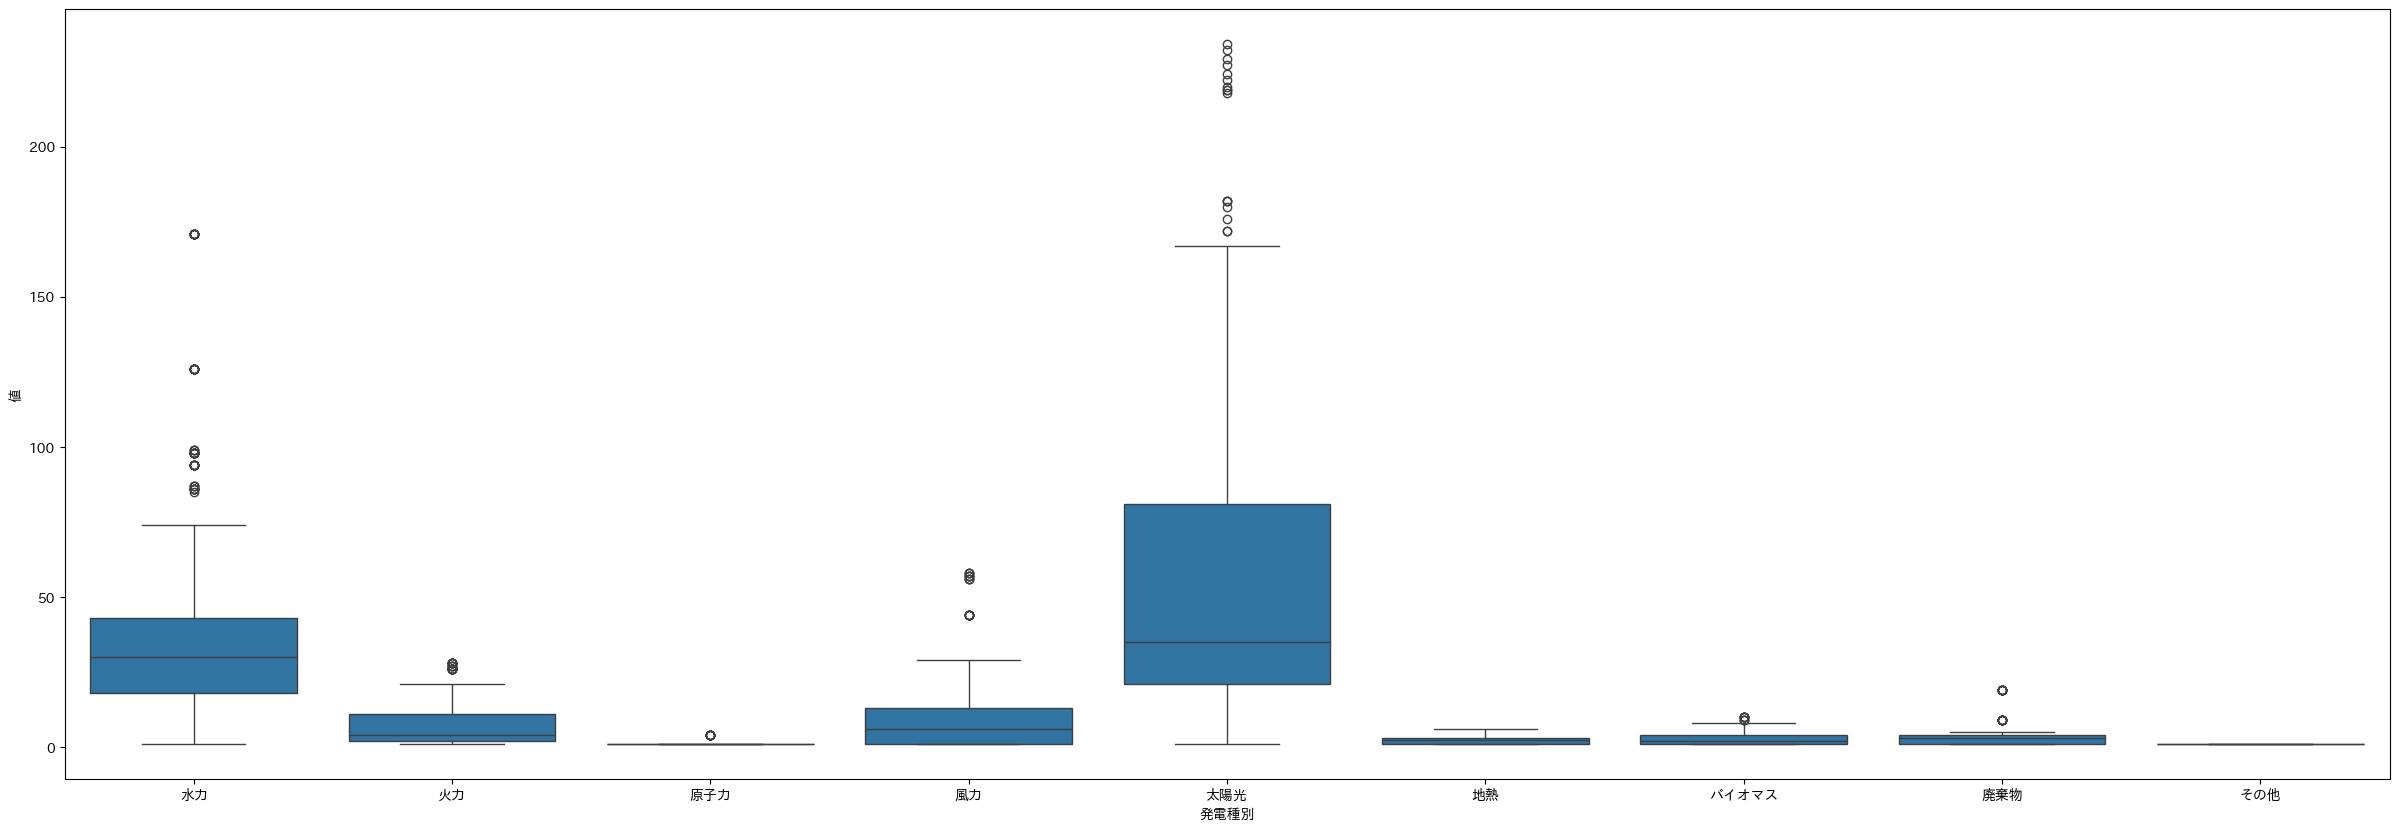

In [75]:
plt.figure(figsize=(30,10))
sns.boxplot(x=viz_data['発電種別'],y=viz_data['値'])

## ノック３２：最近の発電量を可視化してみよう

In [76]:
viz_data = datas_v_all[['発電種別','値']].loc[(datas_v_all['項目']=='電力量')&(datas_v_all['年月']=='2021.1')]
viz_data = viz_data.groupby('発電種別',as_index=False).sum()
viz_data

,発電種別,値
0,その他,13820.0
1,バイオマス,1743503.812
2,原子力,2582599.24
3,地熱,188180.0
4,太陽光,1777284.97216
5,廃棄物,315955.051
6,水力,5183845.309
7,火力,74569278.605
8,風力,906743.807


<Axes: xlabel='発電種別', ylabel='値'>

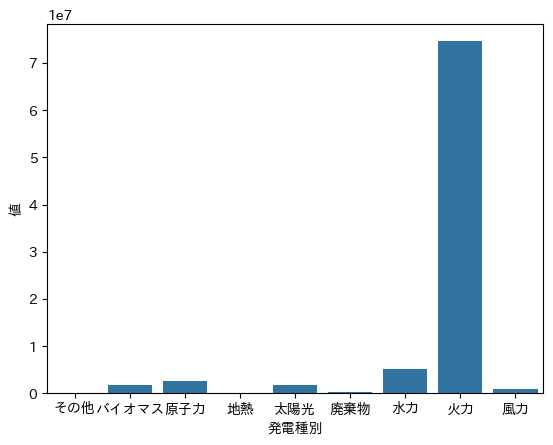

In [77]:
sns.barplot(x=viz_data['発電種別'],y=viz_data['値'])

## ノック３３：先月の発電量とあわせて可視化してみよう

In [78]:
viz_data = datas_v_all[['発電種別','年月','値']].loc[(datas_v_all['項目']=='電力量')]
viz_data = viz_data.groupby(['発電種別','年月'],as_index=False).sum()
viz_data.head()

,発電種別,年月,値
0,その他,2020.10,21670.7
1,その他,2020.11,15571.3
2,その他,2020.12,15759.0
3,その他,2020.4,17256.0
4,その他,2020.5,16782.0


<Axes: xlabel='発電種別', ylabel='値'>

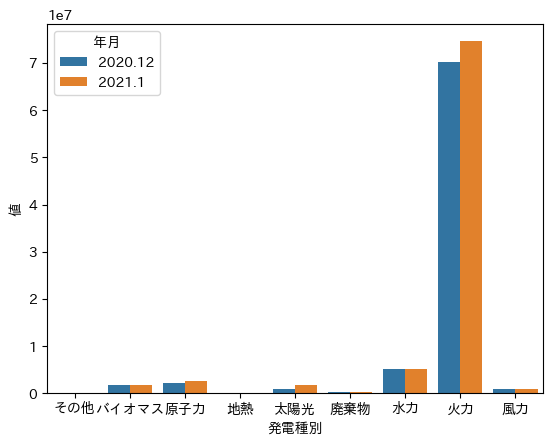

In [79]:
viz_data = viz_data.loc[(viz_data['年月']=='2020.12')|(viz_data['年月']=='2021.1')]
sns.barplot(x=viz_data['発電種別'],y=viz_data['値'],hue=viz_data['年月'])

## ノック３４：電力の時系列変化を可視化してみよう

<ipython-input-80-1caf516eabcd>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  viz_data['年月'] = pd.to_datetime(viz_data['年月'])


<Axes: xlabel='年月', ylabel='値'>

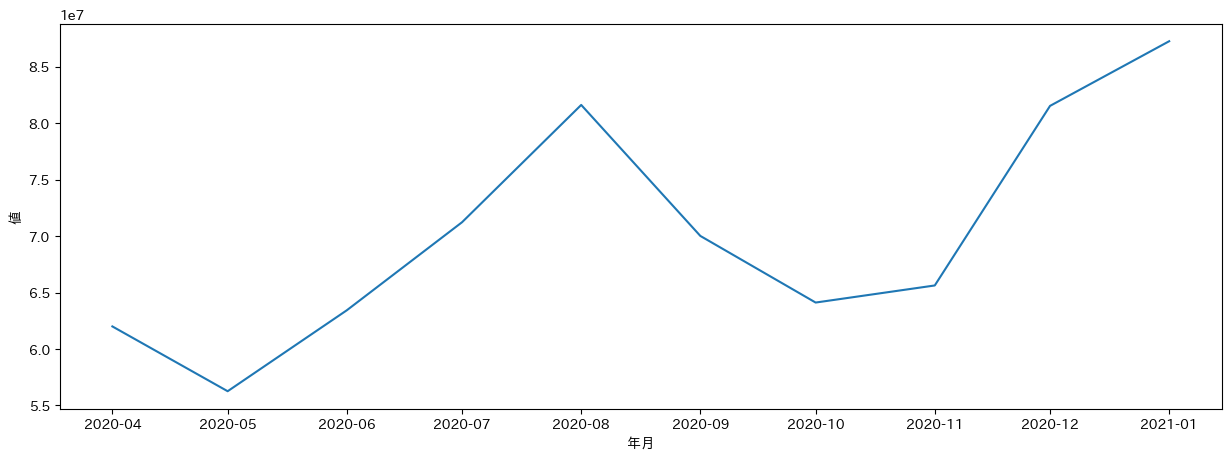

In [80]:
plt.figure(figsize=(15,5))
viz_data = datas_v_all[['発電種別','年月','値']].loc[(datas_v_all['項目']=='電力量')]
viz_data = viz_data.groupby('年月',as_index=False).sum()
viz_data['年月'] = pd.to_datetime(viz_data['年月'])
sns.lineplot(x=viz_data['年月'],y=viz_data['値'])

<ipython-input-81-d9b009a98974>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  viz_data['年月'] = pd.to_datetime(viz_data['年月'])


<Axes: xlabel='年月', ylabel='値'>

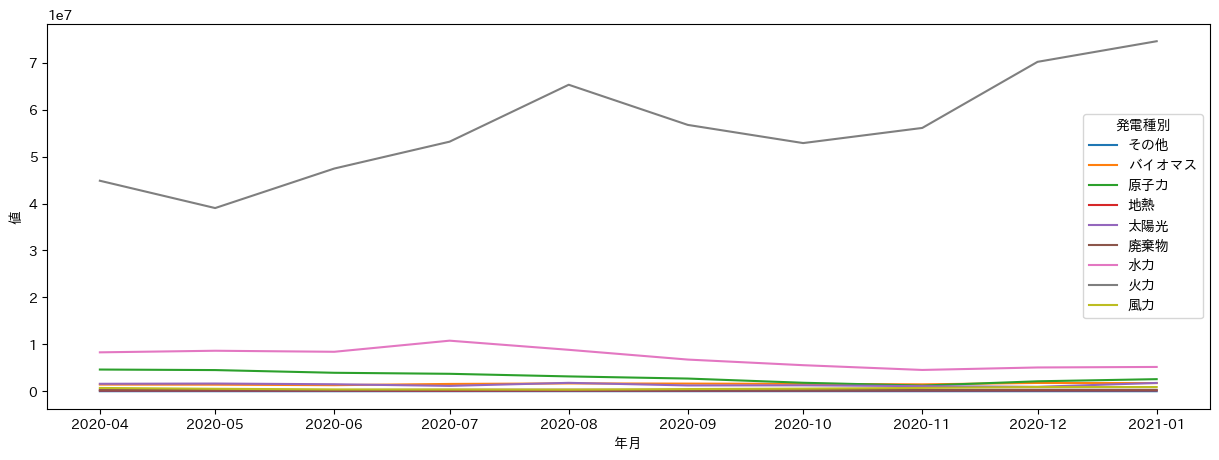

In [81]:
plt.figure(figsize=(15,5))
viz_data = datas_v_all[['発電種別','年月','値']].loc[(datas_v_all['項目']=='電力量')]
viz_data = viz_data.groupby(['発電種別','年月'],as_index=False).sum()
viz_data['年月'] = pd.to_datetime(viz_data['年月'])
sns.lineplot(x=viz_data['年月'],y=viz_data['値'], hue=viz_data['発電種別'])

## ノック３５：電力の割合を可視化してみよう

## ノック３６：電力量の多い都道府県を比較してみよう

## ノック３７：都道府県、年月別の電力量を可視化してみよう

## ノック３８：変数の関係性を可視化してみよう

## ノック３９：データを整形してExcel形式で出力しよう

## ノック４０：シート別にExcelデータを出力しよう